In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Load data
df = pd.read_csv('Carseats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [3]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# See if we have missing data
df.isnull().sum()

Unnamed: 0     0
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
# Create a new boolean column called 'High' for those sales larger than 8
df['High'] = df['Sales'] > 8

In [6]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,True
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,True
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,True
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,False
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,False


In [8]:
# Dummy variables:

# Object columns:
object_col = df.dtypes == object
object_col[object_col == True].index

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [9]:
df[object_col[object_col == True].index].head()

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No


In [11]:
df[object_col[object_col == True].index].describe()
# US and Urban each has 2 unique variables
# ShelveLoc has 3 unique variables: Bad, Medium and Good

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [12]:
dummies = pd.get_dummies(df[object_col[object_col == True].index])
dummies.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0


In [13]:
df_dummies = dummies.iloc[:, ::2] 
df_dummies.head()

,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,0,1,1
1,0,0,1,1
2,0,1,1,1
3,0,1,1,1
4,1,0,1,0


In [14]:
# Drop object dtype columns from df
df.drop(object_col[object_col == True].index, axis = 1, inplace = True)

In [15]:
# Concatenate df and df_dummies
df = pd.concat([df, df_dummies], axis = 1)

In [16]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,9.50,138,73,11,276,120,42,17,True,1,0,1,1
1,2,11.22,111,48,16,260,83,65,10,True,0,0,1,1
2,3,10.06,113,35,10,269,80,59,12,True,0,1,1,1
3,4,7.40,117,100,4,466,97,55,14,False,0,1,1,1
4,5,4.15,141,64,3,340,128,38,13,False,1,0,1,0


In [17]:
# Let's check again if there is any object column in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        400 non-null    int64  
 1   Sales             400 non-null    float64
 2   CompPrice         400 non-null    int64  
 3   Income            400 non-null    int64  
 4   Advertising       400 non-null    int64  
 5   Population        400 non-null    int64  
 6   Price             400 non-null    int64  
 7   Age               400 non-null    int64  
 8   Education         400 non-null    int64  
 9   High              400 non-null    bool   
 10  ShelveLoc_Bad     400 non-null    uint8  
 11  ShelveLoc_Medium  400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_Yes            400 non-null    uint8  
dtypes: bool(1), float64(1), int64(8), uint8(4)
memory usage: 30.2 KB


In [31]:
# Features and target
col = df.columns[2:].tolist()
del col[-5]

In [32]:
col

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Medium',
 'Urban_Yes',
 'US_Yes']

In [63]:
x = df[col].values
y = df['High'].values

In [70]:
"""fit a classification tree in order to predict "High" using all variables but Sales"""

# Create a classification model
clf = DecisionTreeClassifier(random_state=0, min_samples_split=20)
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
# Variable importance
df_imp_var = pd.DataFrame([])
df_imp_var['Features'] = col
df_imp_var['Importance Variable'] = clf.feature_importances_

In [72]:
df_imp_var.sort_values(by = 'Importance Variable', ascending = False, axis = 0, inplace = True)

In [73]:
df_imp_var

,Features,Importance Variable
4,Price,0.328792
2,Advertising,0.173548
0,CompPrice,0.140528
7,ShelveLoc_Bad,0.137692
8,ShelveLoc_Medium,0.071752
5,Age,0.062938
1,Income,0.046218
10,US_Yes,0.014161
6,Education,0.013945
3,Population,0.010426


<IPython.core.display.Javascript object>


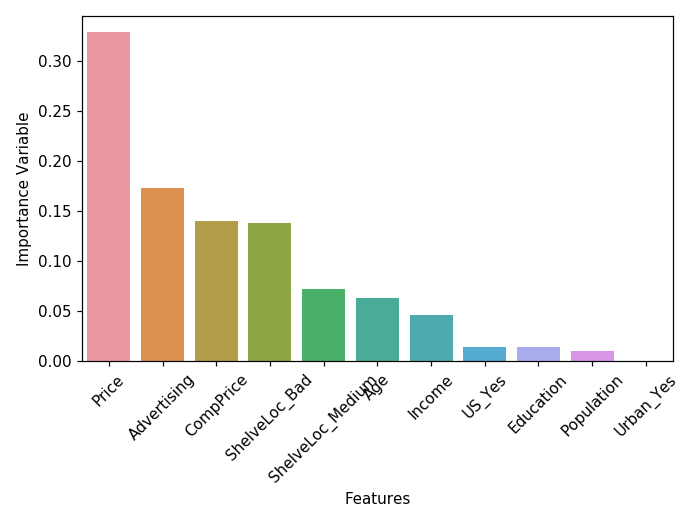

In [74]:
%matplotlib notebook
sns.barplot(df_imp_var['Features'], df_imp_var['Importance Variable'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Importance_variables.png', dpi = 100)

In [ ]:
# training Error Rate
def Err_rate(matrix): 
    return (matrix.sum() - matrix.trace())/ (matrix.sum())

In [83]:
prediction = clf.predict(x)
cm = confusion_matrix(y, prediction)

Err_rate(cm)

0.1275

In [86]:
# Let's see how training error rate changes by min_samples_split
ER = []
min_s_s_range = range(2, 50, 2)
for i in min_s_s_range:
    clf = DecisionTreeClassifier(min_samples_split=i)
    clf.fit(x, y)
    
    prediction = clf.predict(x)
    cm = confusion_matrix(y, prediction)
    
    ER.append(Err_rate(cm))

<IPython.core.display.Javascript object>


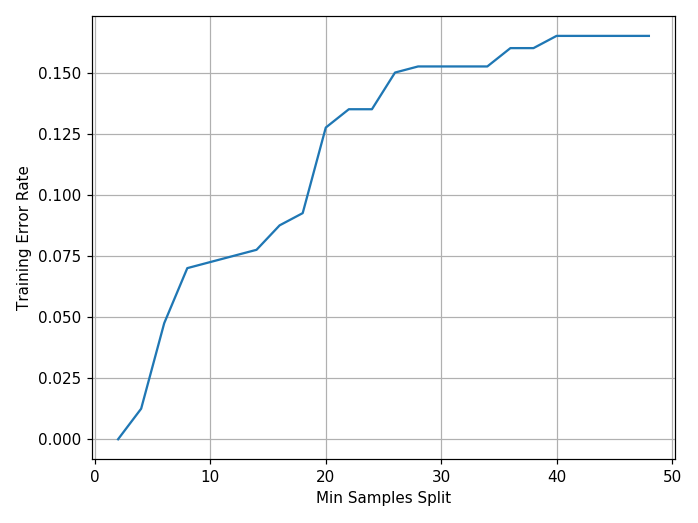

In [89]:
%matplotlib notebook
plt.plot(min_s_s_range, ER)
plt.grid(which = 'both')
plt.xlabel('Min Samples Split')
plt.ylabel('Training Error Rate')
plt.tight_layout()
plt.savefig('Training_Error_rate.png', dpi = 100)

In [77]:
a = confusion_matrix(y, prediction)

In [80]:
a.sum()

400

In [81]:
a.trace()

349

In [ ]:
a.